# Final project -  Top 200 YouTubers
## project number -15

<center><img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/Youtube_2018.gif"
     width="500"  > </center>

- [Link to our DataSet on Kaggle.](https://raw.githubusercontent.com/zivszt/project-masters/main/top_200_youtubers%20(1).csv)
- [Link to Kaggle.](https://www.kaggle.com/datasets/syedjaferk/top-200-youtubers-cleaned)


------------
#### The project is submitted by: 
#### Aviad Weiss
#### Hagay Adda
#### Ziv Sztrigler
#### Dov Radoszkowicz
----------

##### 1. Presentation of the project topic 
  1.1 Presentation of data   
 
 1.2 Dropping repeating duplicate rows                 

1.3 Filling in missing values
 
 1.4 Displaying the updated data

##### 2. Presentation of YouTubers by country
##### 3. Presentation of YouTubers by number of followers
##### 4. Presentation of the different categories of YouTube channels
##### 5. Checking the subcategories within the top category for all YouTubers
##### 6. Predicting the strength index 



In [1091]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk # SciKit learn package
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#  1. Presentation of the project topic
## 1.1  Presentation of data
<a id='section0'></a>



In [1092]:
url="https://raw.githubusercontent.com/zivszt/project-masters/main/top_200_youtubers%20(1).csv"
youtubers_df=pd.read_csv(url)

In [1093]:
youtubers_df.head()

,Country,Channel Name,Category,Main Video Category,username,followers,Main topic,More topics,Likes,Boost Index,...,Views,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 day,Avg. 60 day,Comments Avg,Youtube Link
0,IN,T-Series,Gaming & Apps,Music,T-Series,220000000,Music of Asia,"Entertainment,Music of Asia,Music,Movies",1.602680e+09,83,...,195660744416,2.095329e+06,1.522448e+05,2134569.625,1.809830e+06,2.306178e+06,1.676330e+06,2.295416e+06,4493.984146,UCq-Fj5jknLsUf-MWSy4_brA
1,US,ABCkidTV - Nursery Rhymes,Gaming & Apps,Education,ABCkidTV - Nursery Rhymes,138000000,Movies,"Entertainment,Music,Movies",2.209901e+08,63,...,133025325473,7.027126e+07,1.837916e+06,1837916.000,4.891832e+06,7.052576e+06,1.265433e+07,1.572284e+07,146.700252,UCbCmjCuTUZos6Inko4u57UQ
2,IN,SET India,Gaming & Apps,Shows,SET India,137000000,Movies,"Entertainment,TV shows,Music,Movies",1.748752e+08,79,...,121741739317,1.095729e+05,NaN,586040.000,2.801276e+05,3.437881e+05,3.536019e+05,3.220336e+05,76.244316,UCpEhnqL0y41EpW2TvWAHD7Q
3,US,PewDiePie,Gaming & Apps,Gaming,PewDiePie,111000000,Lifestyle,"Gaming,Action game,Lifestyle,Action-adventure ...",2.191406e+09,88,...,28424113942,7.718345e+06,NaN,NaN,3.497395e+06,3.094440e+06,3.620274e+06,4.454120e+06,35839.781347,UC-lHJZR3Gqxm24_Vd_AJ5Yw
4,US,MrBeast,Gaming & Apps,Entertainment,MrBeast,98100000,Lifestyle,"Entertainment,Lifestyle,Technology",1.731833e+09,60,...,16242634269,9.876250e+07,NaN,NaN,2.994102e+07,2.994102e+07,2.994102e+07,5.343473e+07,113432.373684,UCX6OQ3DkcsbYNE6H8uQQuVA


In [1094]:
youtubers_df.shape

(857, 22)

In [1095]:
youtubers_df.columns

Index(['Country', 'Channel Name', 'Category', 'Main Video Category',
       'username', 'followers', 'Main topic', 'More topics', 'Likes',
       'Boost Index', 'Engagement Rate', 'Engagement Rate 60days', 'Views',
       'Views Avg.', 'Avg. 1 Day', 'Avg. 3 Day', 'Avg. 7 Day', 'Avg. 14 Day',
       'Avg. 30 day', 'Avg. 60 day', 'Comments Avg', 'Youtube Link'],
      dtype='object')

## 1.2 Dropping repeating duplicate rows

### <span style="color:blue">We have a lot of repeating lines, so we removed all the duplicate lines</span>



In [1096]:
youtubers_df.drop_duplicates(subset="Channel Name",inplace=True)
youtubers_df

,Country,Channel Name,Category,Main Video Category,username,followers,Main topic,More topics,Likes,Boost Index,...,Views,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 day,Avg. 60 day,Comments Avg,Youtube Link
0,IN,T-Series,Gaming & Apps,Music,T-Series,220000000,Music of Asia,"Entertainment,Music of Asia,Music,Movies",1.602680e+09,83,...,195660744416,2.095329e+06,1.522448e+05,2.134570e+06,1.809830e+06,2.306178e+06,1.676330e+06,2.295416e+06,4493.984146,UCq-Fj5jknLsUf-MWSy4_brA
1,US,ABCkidTV - Nursery Rhymes,Gaming & Apps,Education,ABCkidTV - Nursery Rhymes,138000000,Movies,"Entertainment,Music,Movies",2.209901e+08,63,...,133025325473,7.027126e+07,1.837916e+06,1.837916e+06,4.891832e+06,7.052576e+06,1.265433e+07,1.572284e+07,146.700252,UCbCmjCuTUZos6Inko4u57UQ
2,IN,SET India,Gaming & Apps,Shows,SET India,137000000,Movies,"Entertainment,TV shows,Music,Movies",1.748752e+08,79,...,121741739317,1.095729e+05,NaN,5.860400e+05,2.801276e+05,3.437881e+05,3.536019e+05,3.220336e+05,76.244316,UCpEhnqL0y41EpW2TvWAHD7Q
3,US,PewDiePie,Gaming & Apps,Gaming,PewDiePie,111000000,Lifestyle,"Gaming,Action game,Lifestyle,Action-adventure ...",2.191406e+09,88,...,28424113942,7.718345e+06,NaN,NaN,3.497395e+06,3.094440e+06,3.620274e+06,4.454120e+06,35839.781347,UC-lHJZR3Gqxm24_Vd_AJ5Yw
4,US,MrBeast,Gaming & Apps,Entertainment,MrBeast,98100000,Lifestyle,"Entertainment,Lifestyle,Technology",1.731833e+09,60,...,16242634269,9.876250e+07,NaN,NaN,2.994102e+07,2.994102e+07,2.994102e+07,5.343473e+07,113432.373684,UCX6OQ3DkcsbYNE6H8uQQuVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,NaN,1theK (원더케이),Music,Music,1theK (원더케이),24100000,Pop music,"Music of Asia,Music,Pop music",2.102143e+08,74,...,22431615067,5.949351e+04,6.996300e+04,4.261843e+04,1.508900e+05,1.141193e+05,1.361403e+05,8.631710e+04,810.979818,UCweOkPb1wVVH0Q0Tlj4a5Pw
653,US,Post Malone,Gaming & Apps,Music,Post Malone,24000000,Music,"Music,Hip hop music,Pop music",1.647143e+07,57,...,12252459767,1.448346e+07,NaN,NaN,NaN,1.066810e+05,1.860830e+06,1.310594e+06,11098.637931,UCeLHszkByNZtPKcaVXOCOQQ
654,IN,Amit Bhadana,NaN,Entertainment,Amit Bhadana,24000000,Entertainment,"Music,Movies,Entertainment",1.139831e+08,60,...,2227021034,2.983444e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100248.500000,UC_vcKmg67vjMP7ciLnSxSHQ
655,US,James Charles,Gaming & Apps,Entertainment,James Charles,24000000,Lifestyle,Lifestyle,1.827409e+08,61,...,3664440993,1.281032e+07,NaN,NaN,6.875610e+05,6.216617e+05,6.195134e+05,8.354377e+05,38414.745174,UCucot-Zp428OwkyRm2I7v2Q


## 1.3 Filling in missing values

#### <span style="color:blue">We only filled the missing values that are relevant to our project</span>


In [1131]:
youtubers_df['Views'].fillna( 0 , inplace = True)
youtubers_df['followers'].fillna( 0 , inplace = True)
youtubers_df['Comments Avg'].fillna( 0 , inplace = True)
youtubers_df['Likes'].fillna( 0 , inplace = True)
youtubers_df.head()

,Country,Channel Name,Category,Main Video Category,username,followers,Main topic,More topics,Likes,Boost Index,...,Views,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 day,Avg. 60 day,Comments Avg,Youtube Link
0,IN,T-Series,Gaming & Apps,Music,T-Series,220000000,Music of Asia,"Entertainment,Music of Asia,Music,Movies",1.602680e+09,83,...,195660744416,2.095329e+06,1.522448e+05,2134569.625,1.809830e+06,2.306178e+06,1.676330e+06,2.295416e+06,4493.984146,UCq-Fj5jknLsUf-MWSy4_brA
1,US,ABCkidTV - Nursery Rhymes,Gaming & Apps,Education,ABCkidTV - Nursery Rhymes,138000000,Movies,"Entertainment,Music,Movies",2.209901e+08,63,...,133025325473,7.027126e+07,1.837916e+06,1837916.000,4.891832e+06,7.052576e+06,1.265433e+07,1.572284e+07,146.700252,UCbCmjCuTUZos6Inko4u57UQ
2,IN,SET India,Gaming & Apps,Shows,SET India,137000000,Movies,"Entertainment,TV shows,Music,Movies",1.748752e+08,79,...,121741739317,1.095729e+05,NaN,586040.000,2.801276e+05,3.437881e+05,3.536019e+05,3.220336e+05,76.244316,UCpEhnqL0y41EpW2TvWAHD7Q
3,US,PewDiePie,Gaming & Apps,Gaming,PewDiePie,111000000,Lifestyle,"Gaming,Action game,Lifestyle,Action-adventure ...",2.191406e+09,88,...,28424113942,7.718345e+06,NaN,NaN,3.497395e+06,3.094440e+06,3.620274e+06,4.454120e+06,35839.781347,UC-lHJZR3Gqxm24_Vd_AJ5Yw
4,US,MrBeast,Gaming & Apps,Entertainment,MrBeast,98100000,Lifestyle,"Entertainment,Lifestyle,Technology",1.731833e+09,60,...,16242634269,9.876250e+07,NaN,NaN,2.994102e+07,2.994102e+07,2.994102e+07,5.343473e+07,113432.373684,UCX6OQ3DkcsbYNE6H8uQQuVA


## 1.4 Displaying the updated data
### The number of rows and columns

In [1098]:
youtubers_df.shape

(200, 22)

### The data frame type by columns

In [1099]:
youtubers_df.dtypes

Country                    object
Channel Name               object
Category                   object
Main Video Category        object
username                   object
followers                   int64
Main topic                 object
More topics                object
Likes                     float64
Boost Index                 int64
Engagement Rate           float64
Engagement Rate 60days    float64
Views                       int64
Views Avg.                float64
Avg. 1 Day                float64
Avg. 3 Day                float64
Avg. 7 Day                float64
Avg. 14 Day               float64
Avg. 30 day               float64
Avg. 60 day               float64
Comments Avg              float64
Youtube Link               object
dtype: object

# Question - How many followers would you think the biggest YouTuber has?

In [1100]:
youtubers_df_top=youtubers_df[["followers"]].sort_values("followers",ascending = False)
youtubers_df_top.head()

,followers
0,220000000
1,138000000
2,137000000
3,111000000
4,98100000


--------
### <span style="color:green"> We can see that the biggest YouTuber in the world has exposure to hundreds of millions the world's population</span>
--------

#  2. Presentation of YouTubers by country

### The number of YouTubers by top ten country

In [1101]:
YouTube_Country=youtubers_df.groupby(['Country'])[["Channel Name"]].count().sort_values('Channel Name',ascending=False).head(10).reset_index()
YouTube_Country

,Country,Channel Name
0,US,67
1,IN,45
2,BR,8
3,CA,4
4,KR,3
5,TH,3
6,CO,3
7,MX,3
8,ID,3
9,IE,3


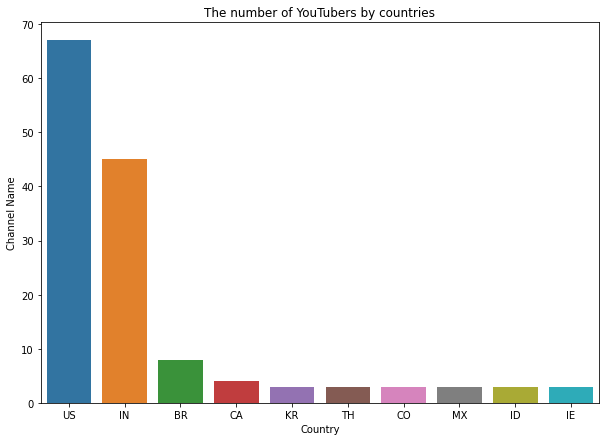

In [1102]:
fig= plt.subplots(figsize=(10, 7))
sns.barplot(data = YouTube_Country, x ='Country',y='Channel Name')
plt.title("The number of YouTubers by countries")
plt.xticks(rotation=0)
plt.show()

### <span style="color:green">We see that the number of the biggest YouTubers come from the two great powers in the world - the USA and India</span>

<center><img src="https://i-hls.com/wp-content/uploads/2015/06/13218205_m.jpg"
     width="500"  > </center>

### <span style="color:blue">We will check the segmentation of all views of YouTubers from each country</span>


In [1103]:
viwes_Country=youtubers_df.groupby(['Country'])[["Views"]].sum().sort_values('Views',ascending=False).head(10).reset_index()
viwes_Country

,Country,Views
0,US,1454736967907
1,IN,1136262522609
2,BR,148325367455
3,CA,99373546328
4,TH,79786876893
5,PH,72459532403
6,RU,60835980843
7,KR,55090630445
8,CO,48764643712
9,PR,43253670909


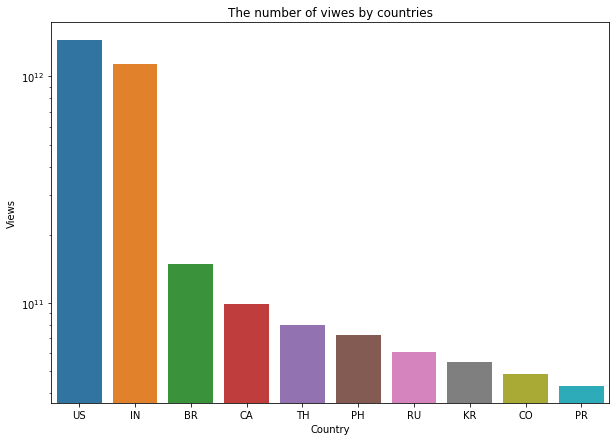

In [1104]:
fig= plt.subplots(figsize=(10, 7))
sns.barplot(data = viwes_Country, x ='Country',y='Views',log=True)
plt.title("The number of viwes by countries")
plt.xticks(rotation=0)
plt.show()

-------
### <span style="color:green">We see that the segmentation by country of the number of YouTubers and the number of views from each country is the same. That means the USA, which has the most YouTubers, also has the most views.                                    From this we can conclude how much global influence the USA and India can have in the field of social media..</span>
-------


#  3.Presentation of YouTubers by number of followers

### Top 10 YouTubers with the most followers
#### The number of followers is indicated in hundred millions

In [1105]:
Top_youtubers=youtubers_df[['Channel Name','followers']].head(10).sort_values('followers',ascending=False)
df=pd.DataFrame(Top_youtubers)
display(df.drop_duplicates())

,Channel Name,followers
0,T-Series,220000000
1,ABCkidTV - Nursery Rhymes,138000000
2,SET India,137000000
3,PewDiePie,111000000
4,MrBeast,98100000
5,Like Nastya,97300000
6,✿ Kids Diana Show,97200000
14,WWE,89400000
15,Zee Music Company,85500000
16,Vlad and Niki,83500000


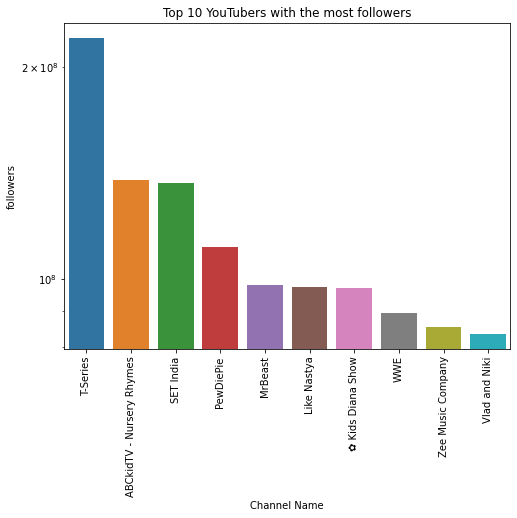

In [1106]:
fig= plt.subplots(figsize=(8, 6))
plt.title("Top 10 YouTubers with the most followers")
sns.barplot(data =Top_youtubers , x='Channel Name', y='followers',log=True)
plt.xticks(rotation=90)
plt.show()

### <span style="color:blue">Now we will check match  if the YouTuber who has the most followers also has the most views, likes and average comments</span>


In [1107]:
Top_liked=youtubers_df[['Channel Name','Likes']].head(5).sort_values('Likes',ascending=False)
df=pd.DataFrame(Top_liked)
display(df.drop_duplicates())

,Channel Name,Likes
3,PewDiePie,2.191406e+09
4,MrBeast,1.731833e+09
0,T-Series,1.602680e+09
1,ABCkidTV - Nursery Rhymes,2.209901e+08
2,SET India,1.748752e+08


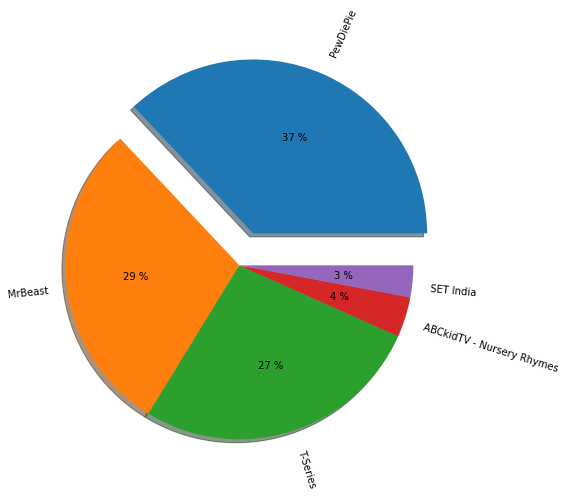

In [1108]:
myexplode = [0.2,0,0,0,0]
fig = plt.subplots(figsize=(10, 8))
plt.pie(Top_liked['Likes'], labels=Top_liked['Channel Name'],autopct='%.0f %%', explode = myexplode, shadow=True, rotatelabels='true');


In [1109]:
Top_viwes=youtubers_df[['Channel Name','Views']].head(5).sort_values('Views',ascending=False)
df=pd.DataFrame(Top_viwes)
display(df.drop_duplicates())

,Channel Name,Views
0,T-Series,195660744416
1,ABCkidTV - Nursery Rhymes,133025325473
2,SET India,121741739317
3,PewDiePie,28424113942
4,MrBeast,16242634269


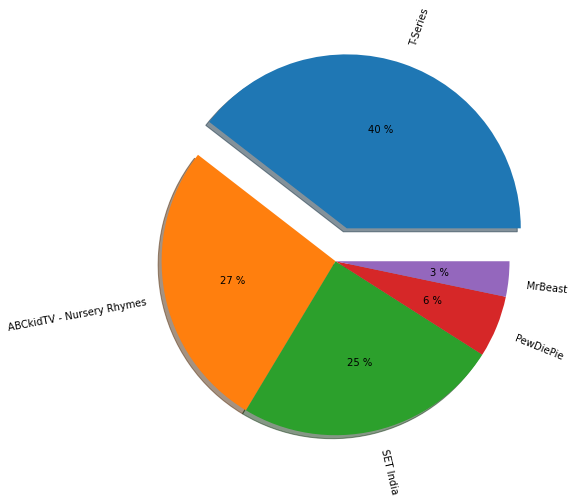

In [1110]:
myexplode = [0.2,0,0,0,0]
fig = plt.subplots(figsize=(10, 8))
plt.pie(Top_viwes['Views'], labels=Top_viwes['Channel Name'],autopct='%.0f %%', explode = myexplode, shadow=True, rotatelabels='true');

In [1111]:
Top_comments=youtubers_df[['Channel Name','Comments Avg']].head(5).sort_values('Comments Avg',ascending=False)
df=pd.DataFrame(Top_comments)
display(df.drop_duplicates())

,Channel Name,Comments Avg
4,MrBeast,113432.373684
3,PewDiePie,35839.781347
0,T-Series,4493.984146
1,ABCkidTV - Nursery Rhymes,146.700252
2,SET India,76.244316


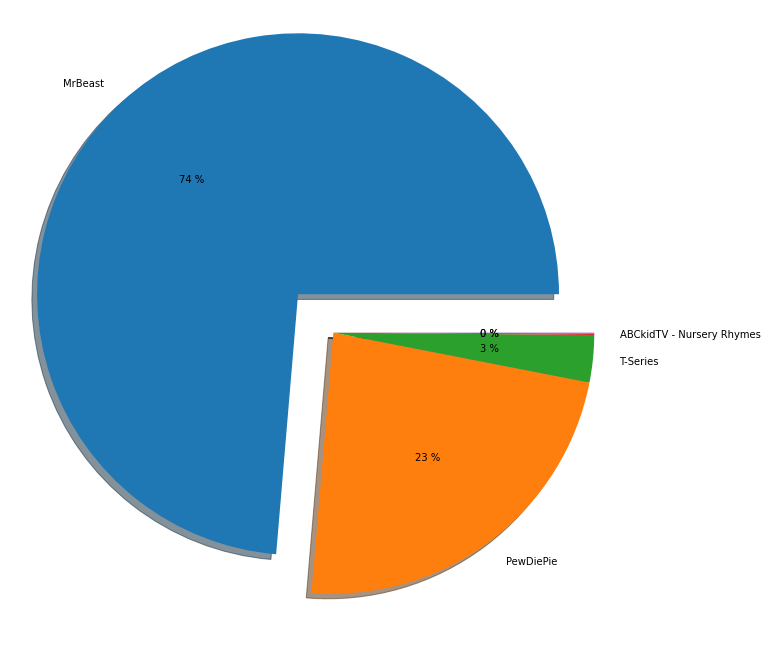

In [1112]:
myexplode = [0.2,0,0,0,0]
fig = plt.subplots(figsize=(15, 12))
classes = ["MrBeast", 'PewDiePie', 'T-Series', 'ABCkidTV - Nursery Rhymes',""]
plt.pie(Top_comments['Comments Avg'], labels = classes,explode = myexplode,autopct='%.0f %%', shadow=True)
plt.show()

### <span style="color:blue">Correlation test between views, followers, likes and average responses 


In [1113]:
features = ['followers', 'Likes','Views','Comments Avg']
correlation_matrix = youtubers_df[features].corr().round(2)
correlation_matrix

,followers,Likes,Views,Comments Avg
followers,1.00,0.46,0.83,0.05
Likes,0.46,1.00,0.19,0.43
Views,0.83,0.19,1.00,-0.19
Comments Avg,0.05,0.43,-0.19,1.00


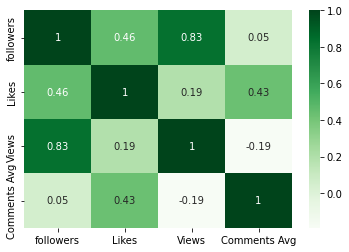

In [1114]:
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True);

## Regression line of followers and views

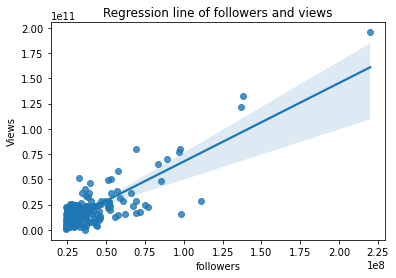

In [1115]:
sns.regplot(x="followers",y="Views",data=youtubers_df);
plt.title("Regression line of followers and views");


----
### <span style="color:green">We see the strong correlation between views and followers and that all the points are clustered and not scattered which indicates a strong positive correlation 
----

<center><img src="https://c.tenor.com/9vbieYTCa6cAAAAC/subscribe-like-and-comment.gif"
     width="500"  > </center>


### <span style="color:green">We can conclude and see that there is a very high correlation between the number of views of a YouTuber and the number of followers he has, which can testify to his popularity. In contrast, there is a low correlation between the number of views and the number of comments, which means that we cannot conclude anything from this.                                              We will advise advertising companies that want to use YouTubers for the purpose of publishing things and promoting content to look for YouTubers who have a match between their number of views and the number of followers.


-----
### <span style="color:green">Link to the YouTube channel of the YouTuber with the most followers: "UCq-Fj5jknLsUf-MWSy4_brA" 
----

<center><img src="https://media.news9live.com/h-upload/2021/12/08/91878-t-series.jpg"
     width="500"  > </center>

# 4. Presentation of the different categories of YouTube channels

### <span style="color:blue">categories</span>

In [1116]:
Types_Category=youtubers_df.groupby("Category").count().reset_index()
Types_Category['Category'].replace('None','other',inplace = True)
Types_Category[["Category"]]

,Category
0,Beauty & Fashion
1,Fashion
2,Gaming & Apps
3,LifeStyle
4,Music
5,other
6,Science & Tech
7,Sports


### <span style="color:blue">subcategories</span>

In [1117]:
Types_Category=youtubers_df.groupby("Main Video Category").count().reset_index()
Types_Category[["Main Video Category"]]

,Main Video Category
0,Action-adventure game
1,Comedy
2,Education
3,Entertainment
4,Film & Animation
5,Gaming
6,Howto & Style
7,Music
8,News & Politics
9,Nonprofits & Activism


-----
### <span style="color:green"> We see that YouTube channels are divided into 8 categories and within them there are subcategories</span>
-----

## Comparison between the number of likes and views for each category

### <span style="color:blue"> 4.1 Which category do you think will get the most likes?</span>

In [1118]:
sum_youtubers_likes=youtubers_df.groupby("Category")[["Likes"]].sum().head(8).sort_values('Likes',ascending=False).reset_index()


In [1119]:
sum_youtubers_likes['Category'].replace('None','other',inplace = True)
sum_youtubers_likes


,Category,Likes
0,Gaming & Apps,2.110082e+10
1,Music,7.134182e+09
2,Beauty & Fashion,2.224210e+09
3,other,1.388322e+09
4,Sports,5.438009e+08
5,LifeStyle,1.301445e+08
6,Science & Tech,3.693215e+07
7,Fashion,1.205009e+06


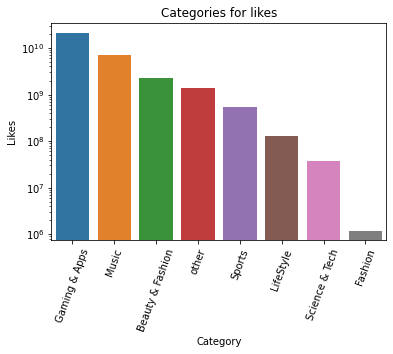

In [1120]:
sns.barplot(data = sum_youtubers_likes, x='Category', y='Likes',log=True)
plt.xticks(rotation=70)
plt.title("Categories for likes")

plt.show()

### <span style="color:blue"> 4.2 Which category do you think will get the most views?</span>

In [1129]:
sum_youtubers_viwes=youtubers_df.groupby("Category")[["Views"]].sum().head(8).sort_values('Views',ascending=False).reset_index()
sum_youtubers_viwes.replace('None','other',inplace = True)
sum_youtubers_viwes

,Category,Views
0,Gaming & Apps,2071795088551
1,Music,1003338743179
2,other,298476961390
3,Beauty & Fashion,76055778358
4,Sports,69794363750
5,LifeStyle,37334043445
6,Fashion,19885240007
7,Science & Tech,9969944772


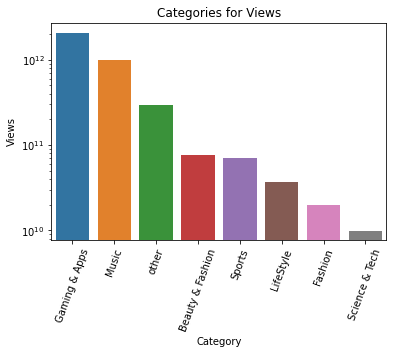

In [1130]:
sns.barplot(data = sum_youtubers_viwes, x='Category', y='Views',log=True)
plt.xticks(rotation=70)
plt.title("Categories for Views")

plt.show()

<center><img src="https://blog.sagipl.com/wp-content/uploads/2018/02/Gaming.gif"
     width="500"  > </center>

------
### <span style="color:green">According to the data, we can conclude that most people like to watch YouTube videos about apps & games and music and this is the most watched categories both by likes and views</span>
------

# 5. Checking the subcategories within the top category for all YouTubers

### <span style="color:blue"> 5.1 We took the category from all the YouTube channels that received the most likes and viwes, and this is the games & apps category, and we will check which subcategory is the most popular among them</span>

In [1123]:
YouTubers_Category=youtubers_df.groupby(['Category','Main Video Category'])[['Views']].sum().reset_index().sort_values('Views',ascending=False)
YouTubers_Category=YouTubers_Category[YouTubers_Category['Category']=='Gaming & Apps']
YouTubers_Category

,Category,Main Video Category,Views
11,Gaming & Apps,Music,734614279425
7,Gaming & Apps,Entertainment,437939783930
6,Gaming & Apps,Education,211284671127
9,Gaming & Apps,Gaming,180099905054
15,Gaming & Apps,Shows,168934370570
8,Gaming & Apps,Film & Animation,145605764095
5,Gaming & Apps,Comedy,54410608666
13,Gaming & Apps,People & Blogs,53356208285
12,Gaming & Apps,News & Politics,31167549443
10,Gaming & Apps,Howto & Style,27424046346


### <span style="color:blue">Let's see the data in the figure</span>

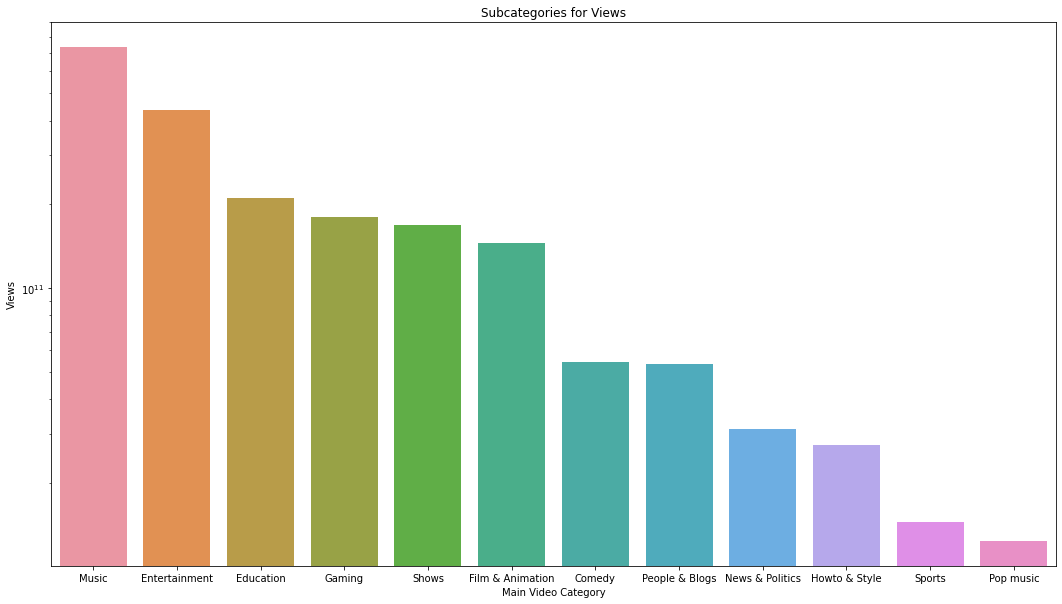

In [1124]:
fig = plt.subplots(figsize=(18,10))
sns.barplot( y="Views", x="Main Video Category",log=True ,data=YouTubers_Category);
plt.title("Subcategories for Views");


---

### <span style="color:green"> We can see in the figure that out of all the subcategories we have some leaders in the number of views and likes. You can see the high place of music, entertainment followed by education.It makes sense for the music and entertainment categories to be in high places because in the end YouTube turns to this topic and most people use it for leisure, but the surprise is that education, which we did not expect to occupy a high place in the level of views and likes.                                      We can conclude from this that people would prefer to watch educational content on YouTube over games/shows/movies</span>
  
### <span style="color:green">We will advise the schools to use educational YouTube videos for the benefit of learning, which can help the student to understand the studies.The world is getting better and better and a student would rather use short videos than an explanation on the board</span> 
---


<center><img src="https://hesegim.org.il/wp-content/uploads/2020/05/29493.jpg"
     width="500"  > </center>


# 6. Predicting the strength index 

### <span style="color:blue">6.1 Prediction of Boost Index by number of followers and views</span> 

In [1125]:
features = ['followers','Views']
X = youtubers_df[features]
y = youtubers_df['Boost Index']

In [1126]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [1127]:
melbourne_model = DecisionTreeRegressor(random_state=4)
melbourne_model.fit(X_train, y_train);

In [1128]:
print("Making predictions all test houses:")
print(y_test)

print("The predictions are")
test_pred = melbourne_model.predict(X_test)
print(test_pred)

print("MSE: {:.3f}".format( mean_squared_error(y_test.values, test_pred , squared=False ) ))

Making predictions all test houses:
552    52
22     70
37     67
615    77
585    57
572    74
76     33
627    72
631    73
52     68
73     75
639    71
622    60
535    28
643    65
634    79
63     83
609    63
539    74
75     62
581    80
23     72
605    20
550    62
72     75
67     75
541    73
74     65
582    78
589    21
16     82
25     75
62     70
532    85
607    30
561    66
592    61
594    38
621    79
533    61
Name: Boost Index, dtype: int64
The predictions are
[78. 69. 82. 50. 55. 65. 70. 79. 74. 78. 70. 81. 73. 43. 52. 70. 75. 37.
 25. 51. 72. 27. 37. 78. 72. 75. 78. 78. 64. 25. 76. 82. 57. 60. 50. 68.
 80. 80. 73. 83.]
MSE: 18.870


---------
### <span style="color:green">You can see the real results of the strength index for each YouTuber that we did and below it in brackets the predictions.We see that the prediction is not perfect and there are standard deviations, so we recommend using this prediction only for getting an estimate</span> 
-------------

# A question for thought?!

<center><img src="https://thumbs.gfycat.com/EuphoricRemorsefulAnole-size_restricted.gif" width="250"  > </center>
<center><img src="https://www.mobileye.com/he-il/wp-content/uploads/2017/09/product_style-2.png" width="250"  > </center>
<center><img src="https://img.zap.co.il/pics/8/4/7/3/57383748c.gif" width="250"  > </center>
 <center><img src="https://images.maariv.co.il/image/upload/f_auto,fl_lossy/c_fill,g_faces:center,h_912,w_1200/626501 " width="250"  > </center>
<center><img src="https://greengourmet.co.il/wp-content/uploads/2021/08/tomatoes-5962215_1920_optimized.jpg" width="250"  > </center>









## <span style="color:blue">How do you turn Israel into a YouTube power?</span> 

<center><img src="https://tapi.blog/wp-content/uploads/2017/10/d7a1d799d79ed79f-d7a9d790d79cd794.png"
     width="100"  > </center>


